<a href="https://colab.research.google.com/github/onlookertozip/Day20180528/blob/master/Level1_13_%ED%86%B5%EA%B3%84%EB%AA%A8%EB%8D%B8_%EB%B6%84%EC%82%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
#그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
#표시 자릿수 지정
%precision 3
#그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [0]:
#샘플 데이터
weather = [
           "cloudy","cloudy",
           "rainy","rainy",
           "sunny","sunny"
]
beer = [6,8,2,4,10,12]
#데이터프레임
weather_beer = pd.DataFrame({
    "beer"   : beer,
    "weather": weather
})
print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


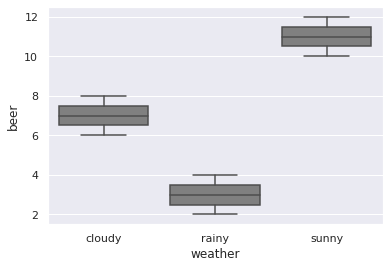

In [0]:
sns.boxplot(x="weather",y="beer", data=weather_beer, color='gray')

In [0]:
print(weather_beer.groupby("weather").mean())

         beer
weather      
cloudy      7
rainy       3
sunny      11


In [0]:
#날씨에 의한 영향
effect=[7,7,3,3,11,11]
effect

[7, 7, 3, 3, 11, 11]

In [0]:
#군간  편차제곱합 계산
mu_effect=sp.mean(effect)
squares_model=sp.sum((effect-mu_effect)**2)
squares_model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  


64.000

In [0]:
#오차 = 원래 데이터-효과
resid=weather_beer.beer -effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [0]:
# 군내 편차제곱합. 오차의 평균값 0
squares_resid=sp.sum(resid**2)
squares_resid

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  """Entry point for launching an IPython kernel.


6

In [0]:
#자유도
df_model=2 #군간변동의 자유도
df_resid=3 #군내변동의 자유도

In [0]:
#군간 평균제곱(분산)
var_model=squares_model /  df_model
var_model

32.000

In [0]:
#군내 평균제곱(분산)
var_resid=squares_resid / df_resid
var_resid

2.000

In [0]:
#F비 = 군간 분산/군내 분산
f_ratio=var_model / var_resid
f_ratio

16.000

In [0]:
#p 값 = F 분포의 누적분포함수에서 계산
1-sp.stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)

0.025

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Level1-13_1_data.csv to Level1-13_1_data.csv
User uploaded file "Level1-13_1_data.csv" with length 2741 bytes


In [0]:
#수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
#그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
#통계모델 추정 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm
#표시 자릿수 지정
%precision 3
#그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

   humidity  price  sales  temperature weather
0      29.5    290  229.7         17.8   rainy
1      38.1    290  206.1         26.1   rainy
2      31.5    290  202.5         22.0   rainy


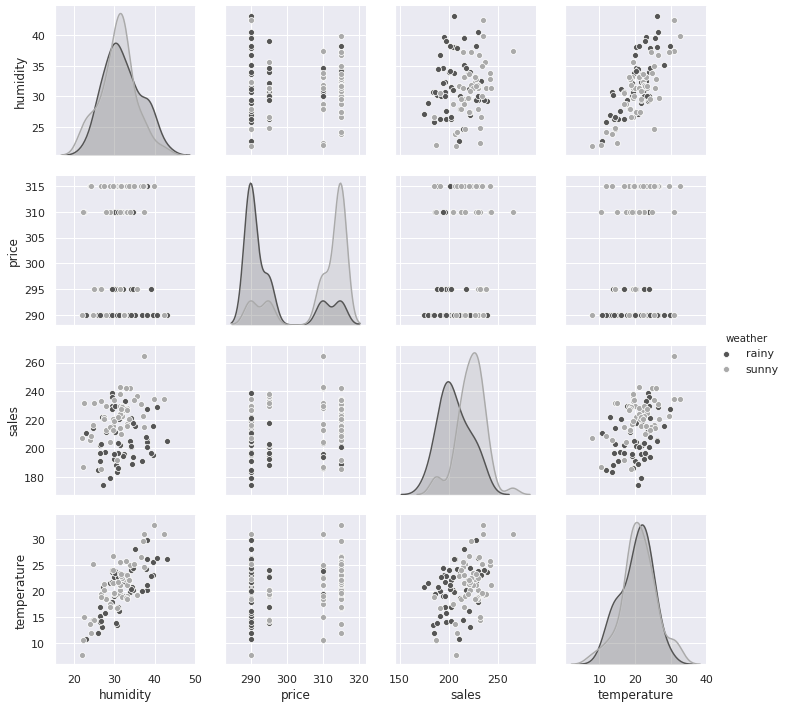

In [0]:
sns.pairplot(data=sales, hue="weather", palette="gray")

In [0]:
lm_dame=smf.ols("sales ~ price", sales).fit()
lm_dame.params

Intercept    113.645406
price          0.332812
dtype: float64

In [0]:
print(sm.stats.anova_lm(lm_dame, typ=2))

                sum_sq    df         F    PR(>F)
price      1398.392322   1.0  4.970685  0.028064
Residual  27570.133578  98.0       NaN       NaN


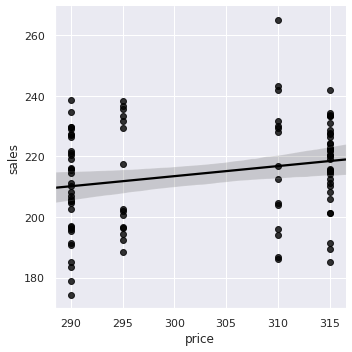

In [0]:
sns.lmplot(x="price", y="sales", data=sales,
           scatter_kws={"color": "black"},
           line_kws={"color": "black"}
           )

In [0]:
print(sales.groupby("weather").mean())

         humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102


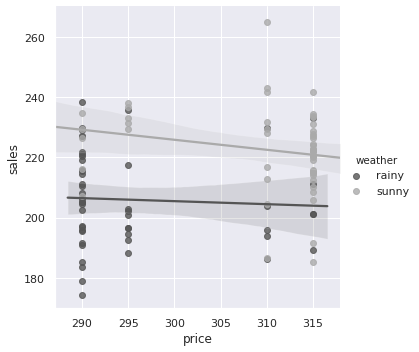

In [0]:
sns.lmplot(
    x="price",y="sales", data=sales,
    hue="weather", palette='gray'
)

In [0]:
lm_sales=smf.ols(
    "sales ~ weather + humidity + temperature + price",
    data=sales
).fit()
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [0]:
print(sm.stats.anova_lm(lm_sales, typ=1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
humidity      1.0   1779.601  1779.601   9.805   0.002
temperature   1.0   2076.845  2076.845  11.443   0.001
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


In [0]:
lm_sales_ch=smf.ols(
    "sales ~ weather + temperature + humidity + price",
    data=sales
).fit()
print(sm.stats.anova_lm(lm_sales_ch, typ=1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
temperature   1.0   3814.779  3814.779  21.018   0.000
humidity      1.0     41.667    41.667   0.230   0.633
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


In [0]:
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [0]:
lm_sales_ch.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [0]:
#Null  모델의 잔차제곱합
mod_null=smf.ols("sales ~ 1",sales).fit()
resid_sq_null=sp.sum(mod_null.resid**2)
resid_sq_null

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  


28968.526

In [0]:
#날씨 모델의 잔차 제곱합
mod_1=smf.ols("sales ~ weather",sales).fit()
resid_sq_1=sp.sum(mod_1.resid**2)
resid_sq_1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  


21917.565

In [0]:
resid_sq_null-resid_sq_1

7050.961

In [0]:
print(sm.stats.anova_lm(mod_1).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  31.527     0.0
Residual  98.0  21917.565   223.649     NaN     NaN


In [0]:
#날씨 습도 모델의 잔차 제곱합
mod_2=smf.ols("sales ~ weather + humidity",sales).fit()
resid_sq_2=sp.sum(mod_2.resid**2)
resid_sq_2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  


20137.964

In [0]:
resid_sq_1-resid_sq_2

1779.601

In [0]:
print(sm.stats.anova_lm(mod_2).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  33.963   0.000
humidity   1.0   1779.601  1779.601   8.572   0.004
Residual  97.0  20137.964   207.608     NaN     NaN


In [0]:
#날씨 온도 모델의 잔차 제곱합
mod_3_1=smf.ols("sales ~ weather + temperature",sales).fit()
resid_sq_3_1=sp.sum(mod_3_1.resid**2)
resid_sq_3_1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  


18102.786

In [0]:
#날씨 온도 습도 모델의 잔차 제곱합
mod_3_2=smf.ols("sales ~ weather + temperature + humidity",sales).fit()
resid_sq_3_2=sp.sum(mod_3_2.resid**2)
resid_sq_3_2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  


18061.119

In [0]:
resid_sq_3_1-resid_sq_3_2

41.667

In [0]:
print(sm.stats.anova_lm(mod_3_2).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  37.478   0.000
temperature   1.0   3814.779  3814.779  20.277   0.000
humidity      1.0     41.667    41.667   0.221   0.639
Residual     96.0  18061.119   188.137     NaN     NaN
